<font color='#f5b120' size= '6'><img src='https://www.thesparksfoundationsingapore.org/images/logo_small.png' width=40 height=40/>  The Sparks Foundation </font><br>
<font color='#1bb4b9' size= '5.5'>Name: Thanendra Kashyap</font><br>
<font color='#1bb4b9' size= '5.5'>Task 1 : Prediction using Supervised Machine Learning</font>


<font size= '5.5'>**Importing Libraries**</font>

In [ ]:
#For Data Manipulation
import pandas as pd
import numpy as np

#For Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#For Statistics Related Task
from scipy import stats

from google.colab import data_table
data_table.enable_dataframe_formatter()

<font size= '5.5' >**Problem Statement**</font><br>
<font size= '4.5' color='#0073b1'>Predict the Percentage of an student based on no. of study hours. This is simple regression task just involving two variables</font>

<font size= '5.5'>**Data Gathering**</font>


In [ ]:
#Reading Dataset Remotely
df = pd.read_csv("http://bit.ly/w-data")
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


<font size= '4.5' color='#0073b1'>Checking Null Value</font>

In [ ]:
df.isnull().sum()

#No null values

Hours     0
Scores    0
dtype: int64

<font size= '5.5'>**Exploratory Data Analysis**</font>


In [ ]:
#Descriptive Analysis
df.describe(include="all").T

,count,mean,std,min,25%,50%,75%,max
Hours,25.0,5.012,2.525094,1.1,2.7,4.8,7.4,9.2
Scores,25.0,51.480,25.286887,17.0,30.0,47.0,75.0,95.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


<font size= '4.5' color='#0073b1'>Outlier Detection using Z-score</font>

In [ ]:
z_scores = stats.zscore(df["Hours"])
print(z_scores)
df = df[z_scores < 3]
df_with_outlier = df[z_scores >= 3]

print("Total Outliers are ",len(df_with_outlier))
#No outlier detected in dataset using zscore

0    -1.015328
1     0.035569
2    -0.732394
3     1.409819
4    -0.611137
5    -1.419519
6     1.692753
7     0.197245
8     1.328981
9    -0.934490
10    1.086466
11    0.358922
12   -0.206946
13   -0.691975
14   -1.581196
15    1.571495
16   -1.015328
17   -1.257843
18    0.439760
19    0.965209
20   -0.934490
21   -0.085689
22   -0.489880
23    0.763113
24    1.126885
Name: Hours, dtype: float64
Total Outliers are  0


<font size= '4.5' color='#0073b1'>Outlier Detection using Boxplot</font>

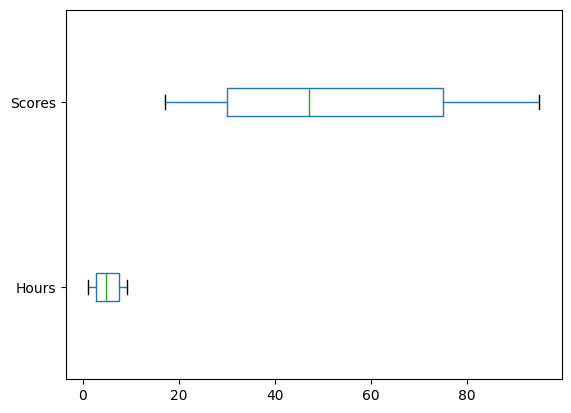

In [ ]:
df.boxplot(vert=False)
plt.grid(False)
plt.show()

#No Outlier Detected in Given Boxplot

<font size= '4.5' color='#0073b1'>Plotting Scatter Plot</font>

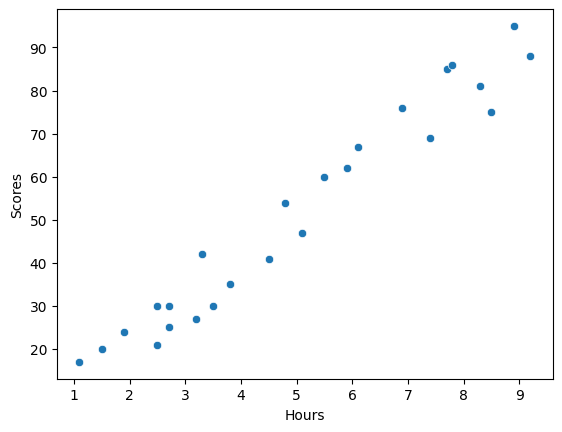

In [ ]:
#Bivarient Analysis
sns.scatterplot(x=df["Hours"], y=df["Scores"], sizes=600)
plt.show()

<font size= '4.5' color='#0073b1'>Plotting Line Plot</font>

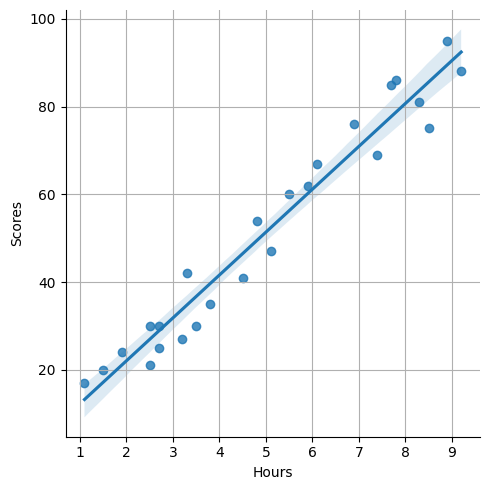

In [ ]:
#Bivarient Analysis
sns.lmplot(x="Hours", y="Scores", data=df)
plt.grid()
plt.show()

<font size= '4.5' color='#0073b1'>Finding Correlation</font>


Correlation is a statistical measure that describes the extent to which two variables are related. It is measured by a number called the correlation coefficient, which can range from -1 to 1. A correlation coefficient of 1 indicates a perfect positive correlation, meaning that as one variable increases, the other variable also increases. A correlation coefficient of -1 indicates a perfect negative correlation, meaning that as one variable increases, the other variable decreases. A correlation coefficient of 0 indicates no correlation, meaning that the two variables are not related

In [ ]:
correlation = df.corr()

<font size= '4.5' color='#0073b1'>Plotting Correlation in Heatmap</font>

<Axes: >

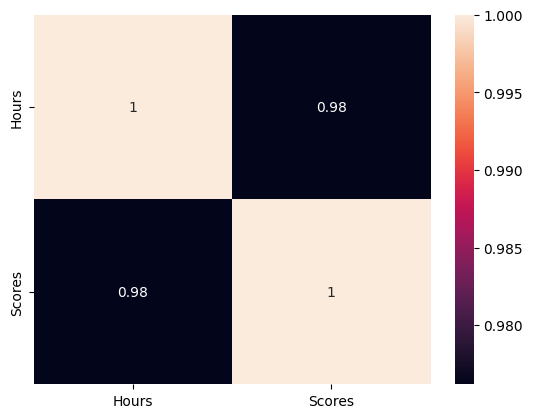

In [ ]:
sns.heatmap(correlation, annot=True)

<font size= '4.5' color='#0073b1'>Plotting Histogram to check data distribution</font>

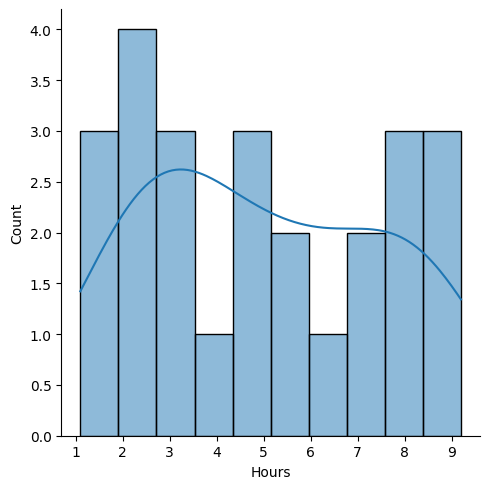

In [ ]:
sns.displot(df["Hours"], kde=True, bins=10)
plt.show()

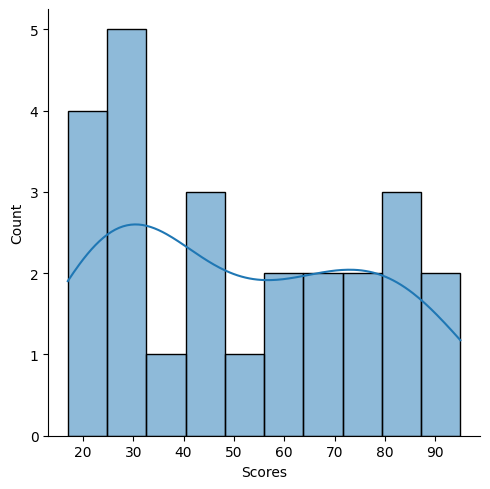

In [ ]:
sns.displot(df["Scores"], kde=True, bins=10)
plt.show()

<font size= '4.5' color='#0073b1'>Segregating Dependent and Independent Variable</font>

In [ ]:
X = df.drop("Scores", axis=1).values
y = df["Scores"].values

<font size= '4.5' color='#0073b1'>Feature Scaling</font>

<font size= '4.5' color='#0073b1'>Spliting in Training and Testing Variable</font>

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42) #20% data for testing and 80% for training

<font size= '4.5' color='#0073b1'>Model Selection</font>

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

<font size= '4.5' color='#0073b1'>Training Our Model</font>

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

<font size= '4.5' color='#0073b1'>Evaluating Our Model</font>

In [ ]:
y_pred = model.predict(X_test)

print("Actual\t\t:",y_test)
print("Predicted\t:",y_pred.flatten())

Actual		: [81 30 21 76 62]
Predicted	: [83.18814104 27.03208774 27.03208774 69.63323162 59.95115347]


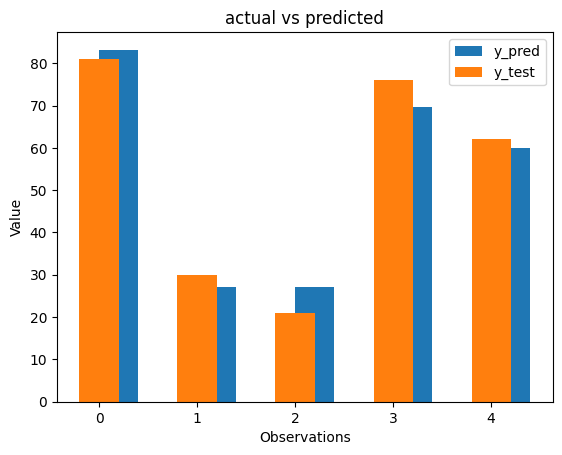

In [ ]:
predicted = y_pred.flatten()
actual = y_test.flatten()

plt.bar(np.arange(len(predicted)), predicted, label='y_pred',width=0.4, align='edge')
plt.bar(np.arange(len(actual)), actual, label='y_test', width=0.4, align='center')
plt.xlabel('Observations')
plt.ylabel('Value')
plt.title('actual vs predicted')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error

print(r2_score(y_test, y_pred.flatten()))
print(mean_squared_error(y_test, y_pred.flatten()))

0.9678055545167994
18.943211722315272


In [ ]:
l=[[9.25]] #9.25 hr/day
model.predict(l)

array([92.38611528])

In [ ]:
#so studying 9.25 hr/day can score 92 %